# Logistic Regression on Titanic Dataset

* Project: Trying to predict survival
* Project Scope: Analyze,Visualize and apply Logistic Regression model  Titanic Dataset
* Data source: [Titanic DataSet from Kaggle](https://www.kaggle.com/c/titanic) 

## Import libraries & Load data

In [1]:
# Import Data Analysis libraries
import pandas as pd
import numpy as np

# Import Data Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For display in notebook
%matplotlib inline

# Load data
dataset = pd.read_csv('titanic_train.csv')

## Lets  analyze and visualize data 

In [2]:
# let check information in the CSV file
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* We can see there are 12 Columns and its datatypes:
* Out of 12 columns, 11 are input variables/features (X), 1 output /target variable (y) 
* There are 891 rows/training examples (m)

In [3]:
# lets check the data
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here are the details of each column - 

* PassengerId:      Passenger Id
* Survived:         Survived 1 or 0
* Pclass:           Passenger class
* Name:             Name of the Passenger
* Sex:              Gender of the Passenger
* Age:              Age of the Passenger
* SibSp:            Sibilings / sposes on board
* Parch:            Parents or children on board
* Ticket:           Ticket number
* Fare:             Ticket Fare
* Cabin:            Cabin number
* Embarked:         Port Passenter boarded

In [4]:
# Checking for null columns
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see for Cabin (about 80%), Age features(about 20%) we got significant number of null values

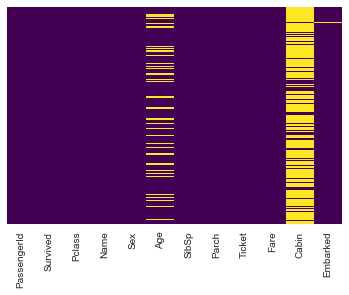

In [5]:
# Lets Visualize null data
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [6]:

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


this gives descriptive statistics that sumarize the central tendency of numarical columns

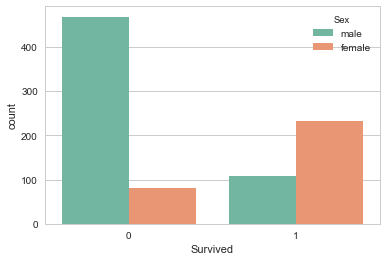

In [7]:
# Lets check who survived based on gender
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', 
              data = dataset,
              hue = 'Sex',
              palette ='Set2')
plt.show()

we can notice more Women survied compared to men

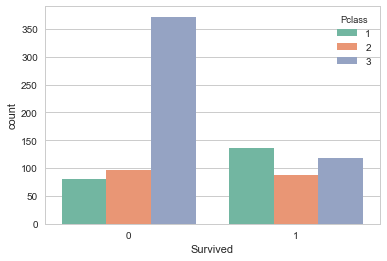

In [8]:
# Lets check who survived based on passenger class
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', 
              data = dataset,
              hue = 'Pclass',
              palette ='Set2')
plt.show()

More class 3 passengers could not survive

C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


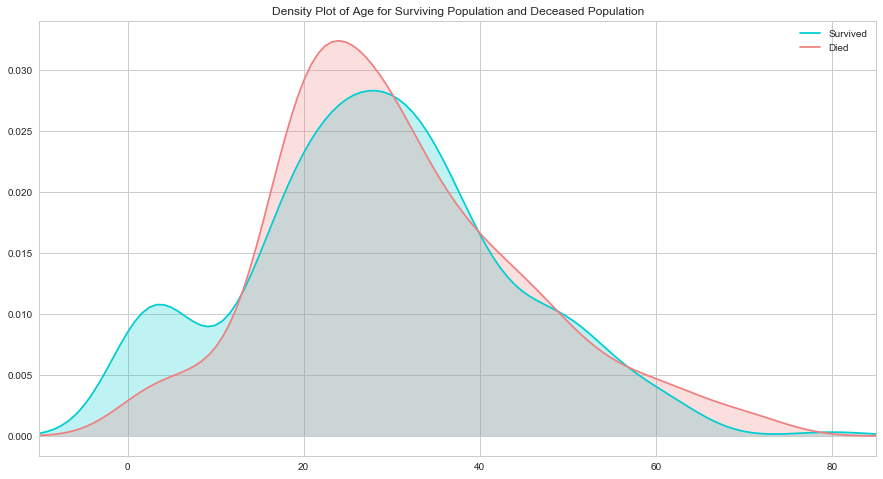

In [10]:
plt.figure(figsize=(15,8))
sns.kdeplot(dataset["Age"][dataset.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(dataset["Age"][dataset.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

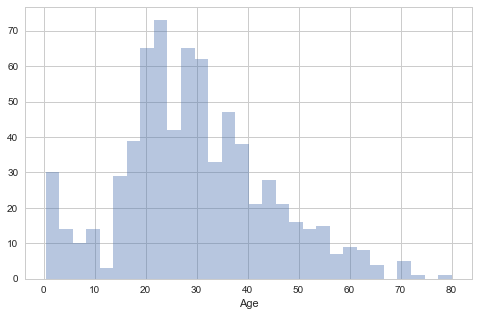

In [11]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['Age'].dropna(), kde=False, bins =30)
plt.show()

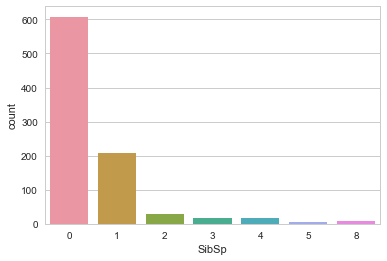

In [12]:
sns.countplot(x='SibSp',data=dataset)
plt.show()

we can see many of the passengers dont have any siblings or spouse

## Data Cleaning

Lets fill in missing age data instead of just dropping data rows. We will do it by Mean age by passenger class

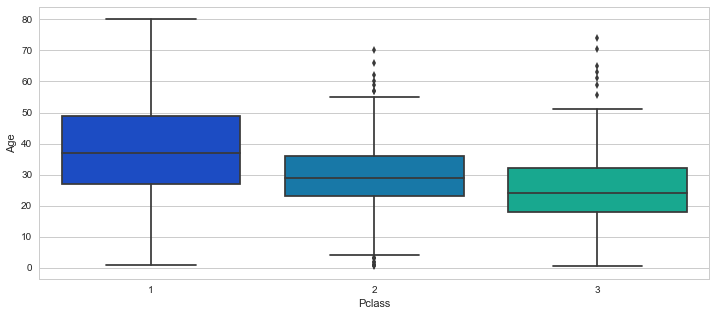

In [13]:
# Lets check the age of passenger in each class
plt.figure(figsize=(12,5))
sns.boxplot(x = 'Pclass',
            y = 'Age',
            data = dataset,
            palette ='winter')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [15]:
# Lets apply impute_age function
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

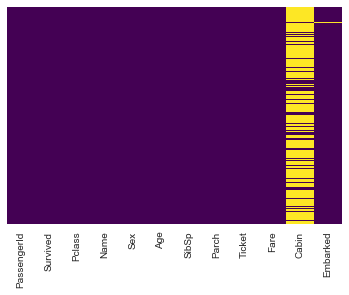

In [16]:
# Lets check the heat map again
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

we can see age data is not null now

In [17]:
# we can drop the 'Cabin' column
dataset.drop('Cabin',axis=1,inplace=True)

In [18]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


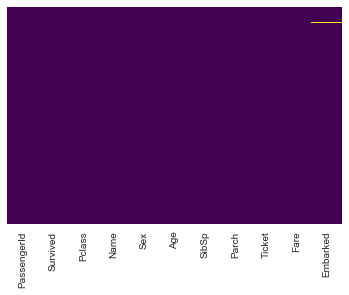

In [19]:
# Lets see any more missing data in our dataset
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

we got couple of rows of data is missing for Embarked column

In [20]:
dataset.dropna(inplace=True)
# this will drop any missing data rows

## Converting Categorical Features 

In [21]:
# Lets convert the 'Sex', 'Embarked'
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)
pclass = pd.get_dummies(dataset['Pclass'],drop_first=True)

In [22]:
# Lets concatenate above two data frames to our train dataset
dataset =pd.concat([dataset, sex, embark, pclass],axis=1)

In [23]:
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0


Now we can see two new columns in out dataset. Lets now drop Sex, Embarked, Pclass since we got new columns and also we will drop PassengerId, Name, Ticket columns, which we wont be using for our model

In [24]:
dataset.drop(['Sex','Embarked','Name','Ticket','PassengerId','Pclass'],axis=1,inplace=True)

In [25]:
dataset.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


# Implementing the model

In [26]:
X = dataset.drop('Survived', axis =1)
y = dataset['Survived']

In [31]:
X.head(1)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,7.25,1,0,1,0,1


**Feature ranking with recursive feature elimination and cross-validation**

Optimal number of features: 9
Selected features: ['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3]


C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


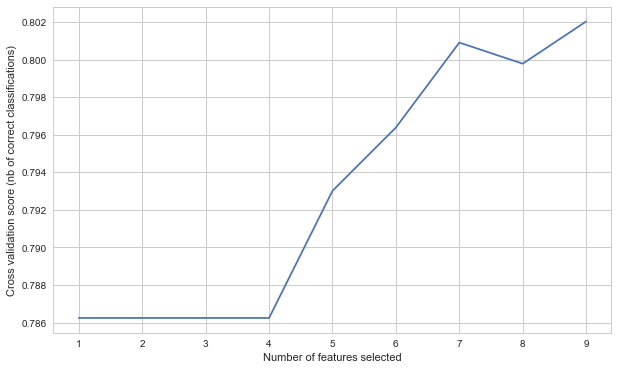

In [28]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

These are the optimal number of features

In [32]:
# we can check P-Value of the features
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

C:\Users\HOME\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.487677
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                            8
Date:                Sat, 03 Nov 2018   Pseudo R-squ.:                  0.2669
Time:                        23:20:05   Log-Likelihood:                -433.55
converged:                       True   LL-Null:                       -591.41
                                        LLR p-value:                 1.843e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0042      0.006      0.760      0.447      -0.007       0.015
SibSp         -0.2489      0.

The p-values for all the variables are smaller than 0.05, therefore, we will continue creating our model. In case any column has p-value greater than 0.05 we will remove them and continue..

## Spliting data into test and train sets

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)
for item in [X_train,X_test,y_train,y_test]:
    print(item.shape)

(622, 9)
(267, 9)
(622,)
(267,)


## Feature Scaling

In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# Lets see how the data will be after feature scaling
X_train[:2,:]

array([[ 0.21972261,  1.22339532, -0.48351818,  0.84163334,  0.70881271,
        -0.2956562 ,  0.60087464,  1.89931762, -1.11601405],
       [-0.52472249, -0.46385942, -0.48351818, -0.48715856, -1.41080991,
         3.38230691, -1.66424066, -0.52650488,  0.89604607]])

In [36]:
X_test[:2,:]

array([[ 1.48527929,  0.37976795, -0.48351818,  0.5067414 ,  0.70881271,
        -0.2956562 , -1.66424066, -0.52650488, -1.11601405],
       [ 0.51750066, -0.46385942, -0.48351818, -0.11252008,  0.70881271,
        -0.2956562 ,  0.60087464, -0.52650488, -1.11601405]])

## Fitting Logistic Regression to the Training set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 99).fit(X_train, y_train)

In [38]:
print("Training set accuracy: {:.3f}".format(classifier.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(classifier.score(X_test, y_test)))

Training set accuracy: 0.820
Test set accuracy: 0.745


## Regularization 

The default regularization value (C)=1 provides with 82% accuracy on training dataset and 74% accuracy on test dataset. Lets try on different regularization values. C= 0.01, 0.1, 10, 100

In [39]:
for C in [0.01,0.1,1,10,100]:
    classifier_r = LogisticRegression(C=C).fit(X_train, y_train)
    
    print(f'For value of C is {C}')
    print("Training set accuracy: {:.3f}".format(classifier_r.score(X_train, y_train)))
    print("Test set accuracy: {:.3f}".format(classifier_r.score(X_test, y_test)))
    print('\n')

For value of C is 0.01
Training set accuracy: 0.814
Test set accuracy: 0.738


For value of C is 0.1
Training set accuracy: 0.825
Test set accuracy: 0.745


For value of C is 1
Training set accuracy: 0.820
Test set accuracy: 0.745


For value of C is 10
Training set accuracy: 0.820
Test set accuracy: 0.745


For value of C is 100
Training set accuracy: 0.820
Test set accuracy: 0.745




We can notice that as the value of C decreases, accuracy is decreasing. Increasing from default has not impact. So lets stick to our default regularization value

## Predicting the Test set results

In [40]:
y_pred = classifier.predict(X_test)

## Evaluating the model

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[126,  37],
       [ 31,  73]])

In [42]:
print('Accuracy of logistic regression classifier on test set is: {:.2f}'
      .format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set is: 0.75


In [43]:
# We can check precision,recall,f1-score using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.77      0.79       163
          1       0.66      0.70      0.68       104

avg / total       0.75      0.75      0.75       267



Our mode has 75% accurate in predecting the Survival of the passenger in the Titanic ship. This is pretty good given the size of the dataset we have.

## Receiver Operating Characteristics Curve

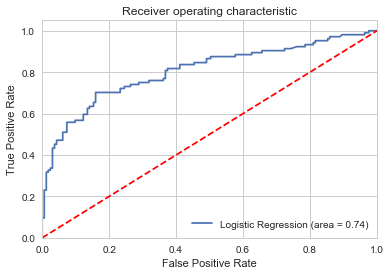

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).